In [3]:
# Import all the necessary packages (data handling, sklearn for carrying out supervised classification, visualisation)

import numpy as np
import pandas as pd

from sklearn import datasets

from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,precision_score,recall_score
from sklearn.metrics import classification_report

import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\zsofi\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [5]:
iris = datasets.load_iris()
feature = iris.data[:, :2]  
label = iris.target

# Split into training and testing

mytrain, mytest, mytrainlabel, mytestlabel = train_test_split(feature, label,train_size = 0.6)

In [6]:
# Apply Random Forest

n_estimators=30
criterion='gini'
max_depth=30
min_samples_split=5
min_samples_leaf=5
max_features='auto'
max_leaf_nodes=None
bootstrap=True
oob_score=True
n_jobs=1
random_state=None
verbose=0
class_weight='balanced'

forest = RandomForestClassifier(n_estimators=n_estimators, criterion=criterion, max_depth=max_depth,
                             min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf,
                             max_features=max_features, max_leaf_nodes=max_leaf_nodes, bootstrap=bootstrap, oob_score=oob_score,
                             n_jobs=n_jobs, random_state=random_state, verbose=verbose,class_weight=class_weight)

RF_classifier = forest.fit(mytrain, mytrainlabel)


In [8]:
# Validation

mypredtest=RF_classifier.predict(mytest)

print(classification_report(mytestlabel, mypredtest)) 
print(confusion_matrix(mytestlabel, mypredtest))

             precision    recall  f1-score   support

          0       0.89      1.00      0.94        17
          1       0.85      0.44      0.58        25
          2       0.57      0.89      0.70        18

avg / total       0.78      0.73      0.72        60

[[17  0  0]
 [ 2 11 12]
 [ 0  2 16]]


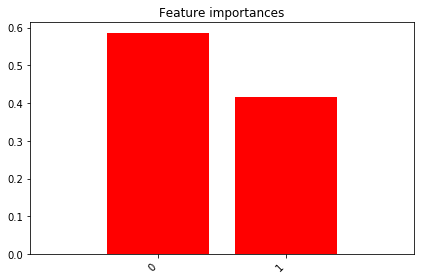

In [11]:
# Get feature importance

importances=RF_classifier.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure()
plt.title("Feature importances")
plt.bar(range(mytrain.shape[1]), importances[indices],
       color="r", align="center")
plt.xticks(range(mytrain.shape[1]), indices,rotation=45,horizontalalignment='right')
plt.xlim([-1, mytrain.shape[1]])
plt.tight_layout()
plt.show()